In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Resources/cleaned_trust_rate.csv')
data.columns = data.columns.str.strip()
print(data.columns)

display(data.head())

Index(['country', 'neighbourhood', 'government', 'scientist', 'journalist',
       'doctor_and_nurses', 'philantropist', 'traditional_healers'],
      dtype='object')


,country,neighbourhood,government,scientist,journalist,doctor_and_nurses,philantropist,traditional_healers
0,Albania,50.72,43.57,49.19,53.49,69.03,54.68,42.43
1,Algeria,67.30,64.98,84.42,44.31,81.13,68.35,74.09
2,Argentina,75.87,43.52,89.37,52.81,92.46,71.40,13.94
3,Australia,92.21,74.49,93.85,71.31,98.09,87.26,57.33
4,Austria,88.44,73.87,95.68,75.35,96.99,82.12,61.15


In [3]:
#making sure columns are float and rounded to 2 decimals
trust_columns = [
    'neighbourhood', 
    'government', 
    'scientist', 
    'journalist', 
    'doctor_and_nurses', 
    'philantropist', 
    'traditional_healers'
]
data[trust_columns] = data[trust_columns].apply(pd.to_numeric, errors='coerce').round(2)
#calculation finding trust disparity for each country
data['disparity'] = data[trust_columns].max(axis=1) - data[trust_columns].min(axis=1)
display(data.head())

,country,neighbourhood,government,scientist,journalist,doctor_and_nurses,philantropist,traditional_healers,disparity
0,Albania,50.72,43.57,49.19,53.49,69.03,54.68,42.43,26.60
1,Algeria,67.30,64.98,84.42,44.31,81.13,68.35,74.09,40.11
2,Argentina,75.87,43.52,89.37,52.81,92.46,71.40,13.94,78.52
3,Australia,92.21,74.49,93.85,71.31,98.09,87.26,57.33,40.76
4,Austria,88.44,73.87,95.68,75.35,96.99,82.12,61.15,35.84


In [4]:
data['doctor_and_nurses'] = pd.to_numeric(data['doctor_and_nurses'], errors='coerce')
print(data['doctor_and_nurses'].head())

0    69.03
1    81.13
2    92.46
3    98.09
4    96.99
Name: doctor_and_nurses, dtype: float64


In [5]:
print(data.columns)
print(trust_columns)

Index(['country', 'neighbourhood', 'government', 'scientist', 'journalist',
       'doctor_and_nurses', 'philantropist', 'traditional_healers',
       'disparity'],
      dtype='object')
['neighbourhood', 'government', 'scientist', 'journalist', 'doctor_and_nurses', 'philantropist', 'traditional_healers']


In [6]:
#finding the top 50 countries w the largest trust disparities
top_50_countries = data.nlargest(50, 'disparity')
for col in trust_columns:
    top_50_countries[col] = pd.to_numeric(top_50_countries[col], errors='coerce')
print(top_50_countries.columns)

Index(['country', 'neighbourhood', 'government', 'scientist', 'journalist',
       'doctor_and_nurses', 'philantropist', 'traditional_healers',
       'disparity'],
      dtype='object')


In [7]:
#reshaping for long format
melted_data = top_50_countries.melt(
    id_vars=['country'],
    value_vars=trust_columns,
    var_name='sector',
    value_name='trust_rate'
)
print(melted_data.head())


              country         sector  trust_rate
0               Spain  neighbourhood       82.65
1  Dominican Republic  neighbourhood       69.45
2           Argentina  neighbourhood       75.87
3              Greece  neighbourhood       71.22
4              Russia  neighbourhood       76.00


In [8]:
print(top_50_countries['doctor_and_nurses'].head())
print(top_50_countries['doctor_and_nurses'].dtype)

92    97.69
26    87.30
2     92.46
38    89.88
84    69.66
Name: doctor_and_nurses, dtype: float64
float64


/var/folders/3_/rmrvnzms2mz1nrycz1_y7_j80000gn/T/ipykernel_67175/3207509575.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=melted_data, x='trust_rate', y='country', size=10, orient="h",


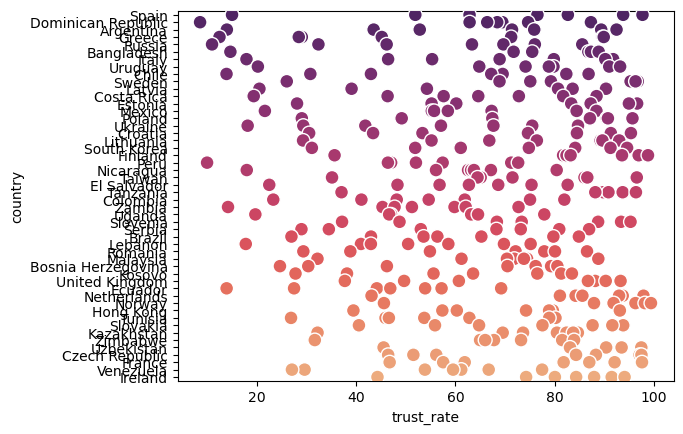

In [9]:
sns.stripplot(data=melted_data, x='trust_rate', y='country', size=10, orient="h",
              jitter=False, palette="flare_r", linewidth=1, edgecolor="w")
plt.show()

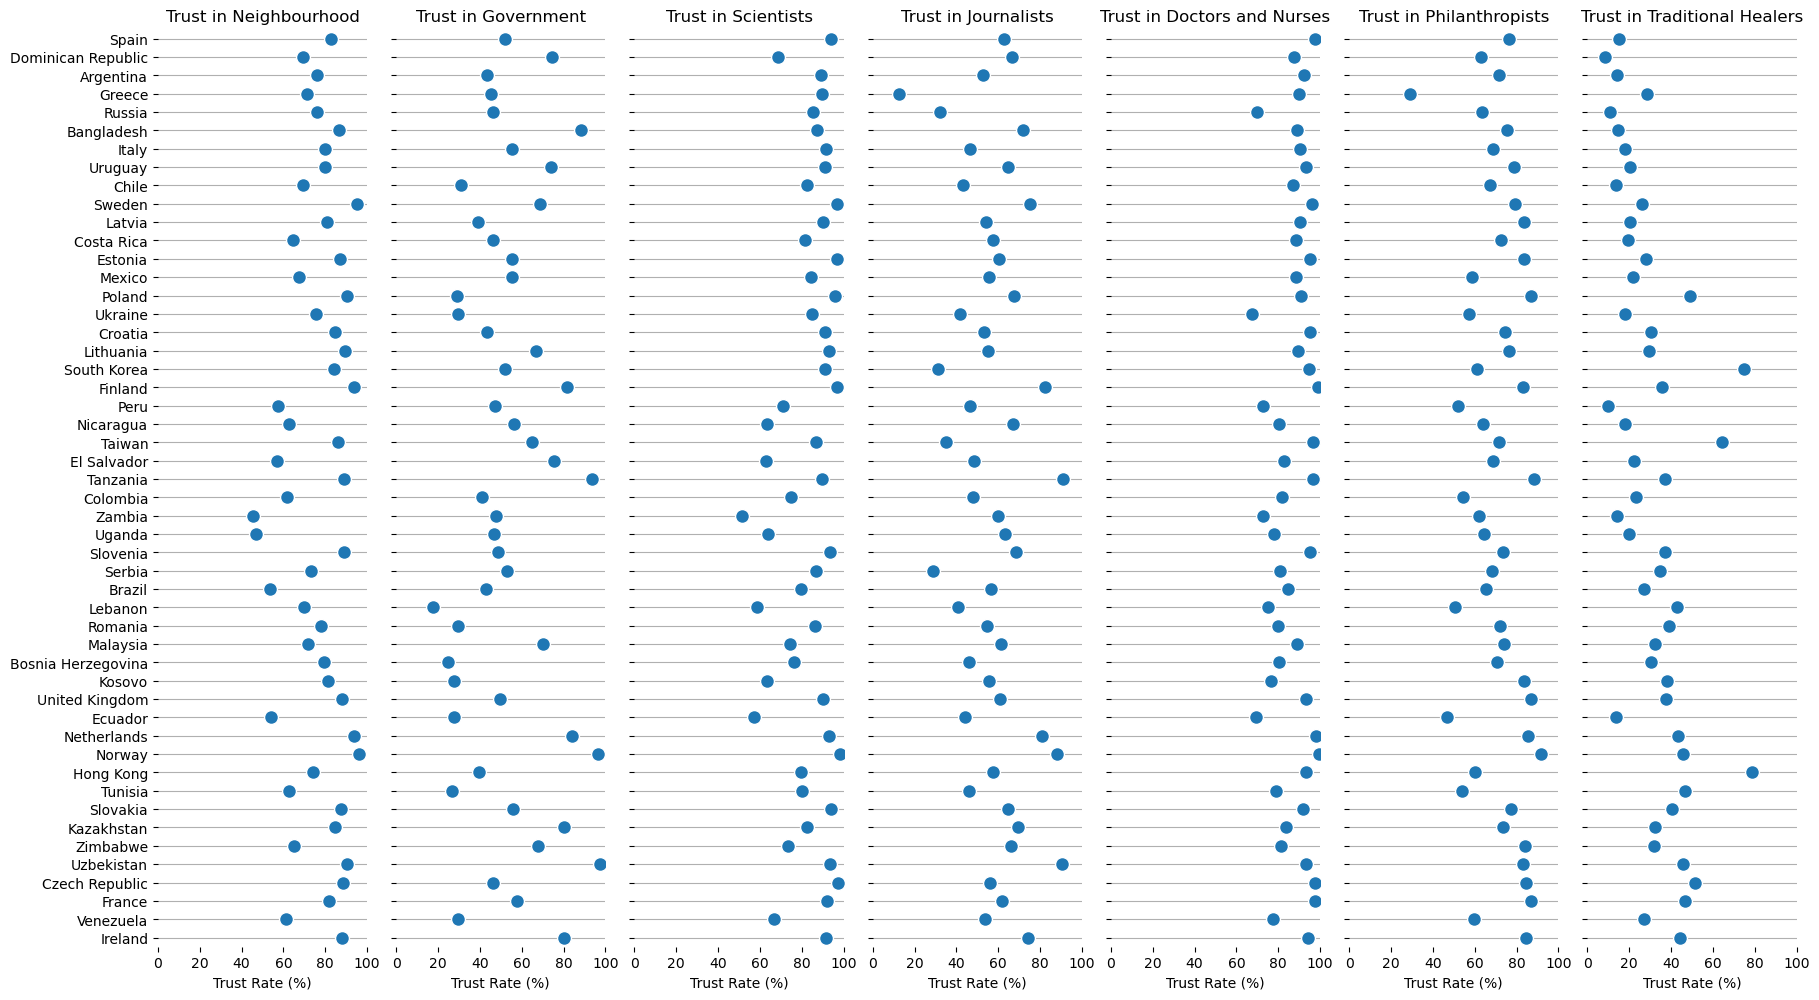

In [10]:
# Create PairGrid

g = sns.PairGrid(top_50_countries.sort_values("disparity", ascending=False),
                 x_vars=trust_columns, y_vars=["country"],
                 height=10, aspect=.25)
# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 100), xlabel="Trust Rate (%)", ylabel="")

# Use semantically meaningful titles for the columns
titles = [
    "Trust in Neighbourhood",
    "Trust in Government",
    "Trust in Scientists",
    "Trust in Journalists",
    "Trust in Doctors and Nurses",
    "Trust in Philanthropists",
    "Trust in Traditional Healers"
]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

# Clean up the plot for a better look
sns.despine(left=True, bottom=True)

plt.show()